In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [49]:
#Read the data set
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [50]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [51]:
data.shape

(400, 11)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [53]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [54]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [55]:
data.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [56]:
data.tail(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [57]:
data.sample(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [58]:
import warnings
warnings.filterwarnings("ignore")

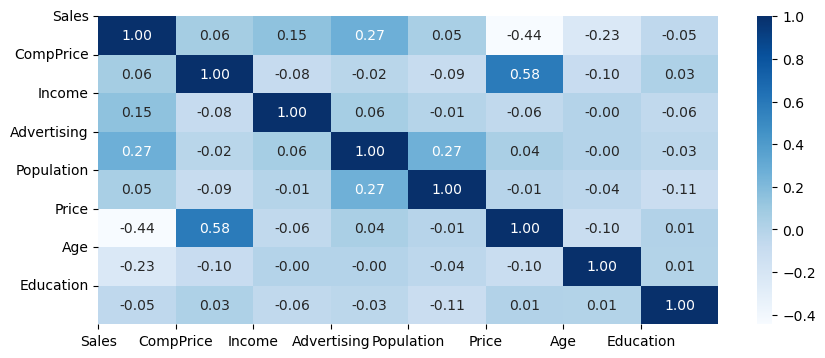

In [59]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(corr, cmap='Blues', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Data preprocessing

In [60]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [61]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])
data['Sales']= label_encoder.fit_transform(data['Sales'])
data.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1


In [62]:
x = data.drop('Sales', axis = 1)
y = data['Sales']

In [63]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [64]:
y.unique()

array([2, 1, 0])

# Test Train splitting

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Building Decision Tree classifier using gini

In [66]:
model1= DecisionTreeClassifier(criterion = 'gini',min_samples_split=3,max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [67]:
y_train

258    1
177    2
119    2
194    2
229    2
      ..
71     2
106    1
270    2
348    0
102    1
Name: Sales, Length: 268, dtype: int32

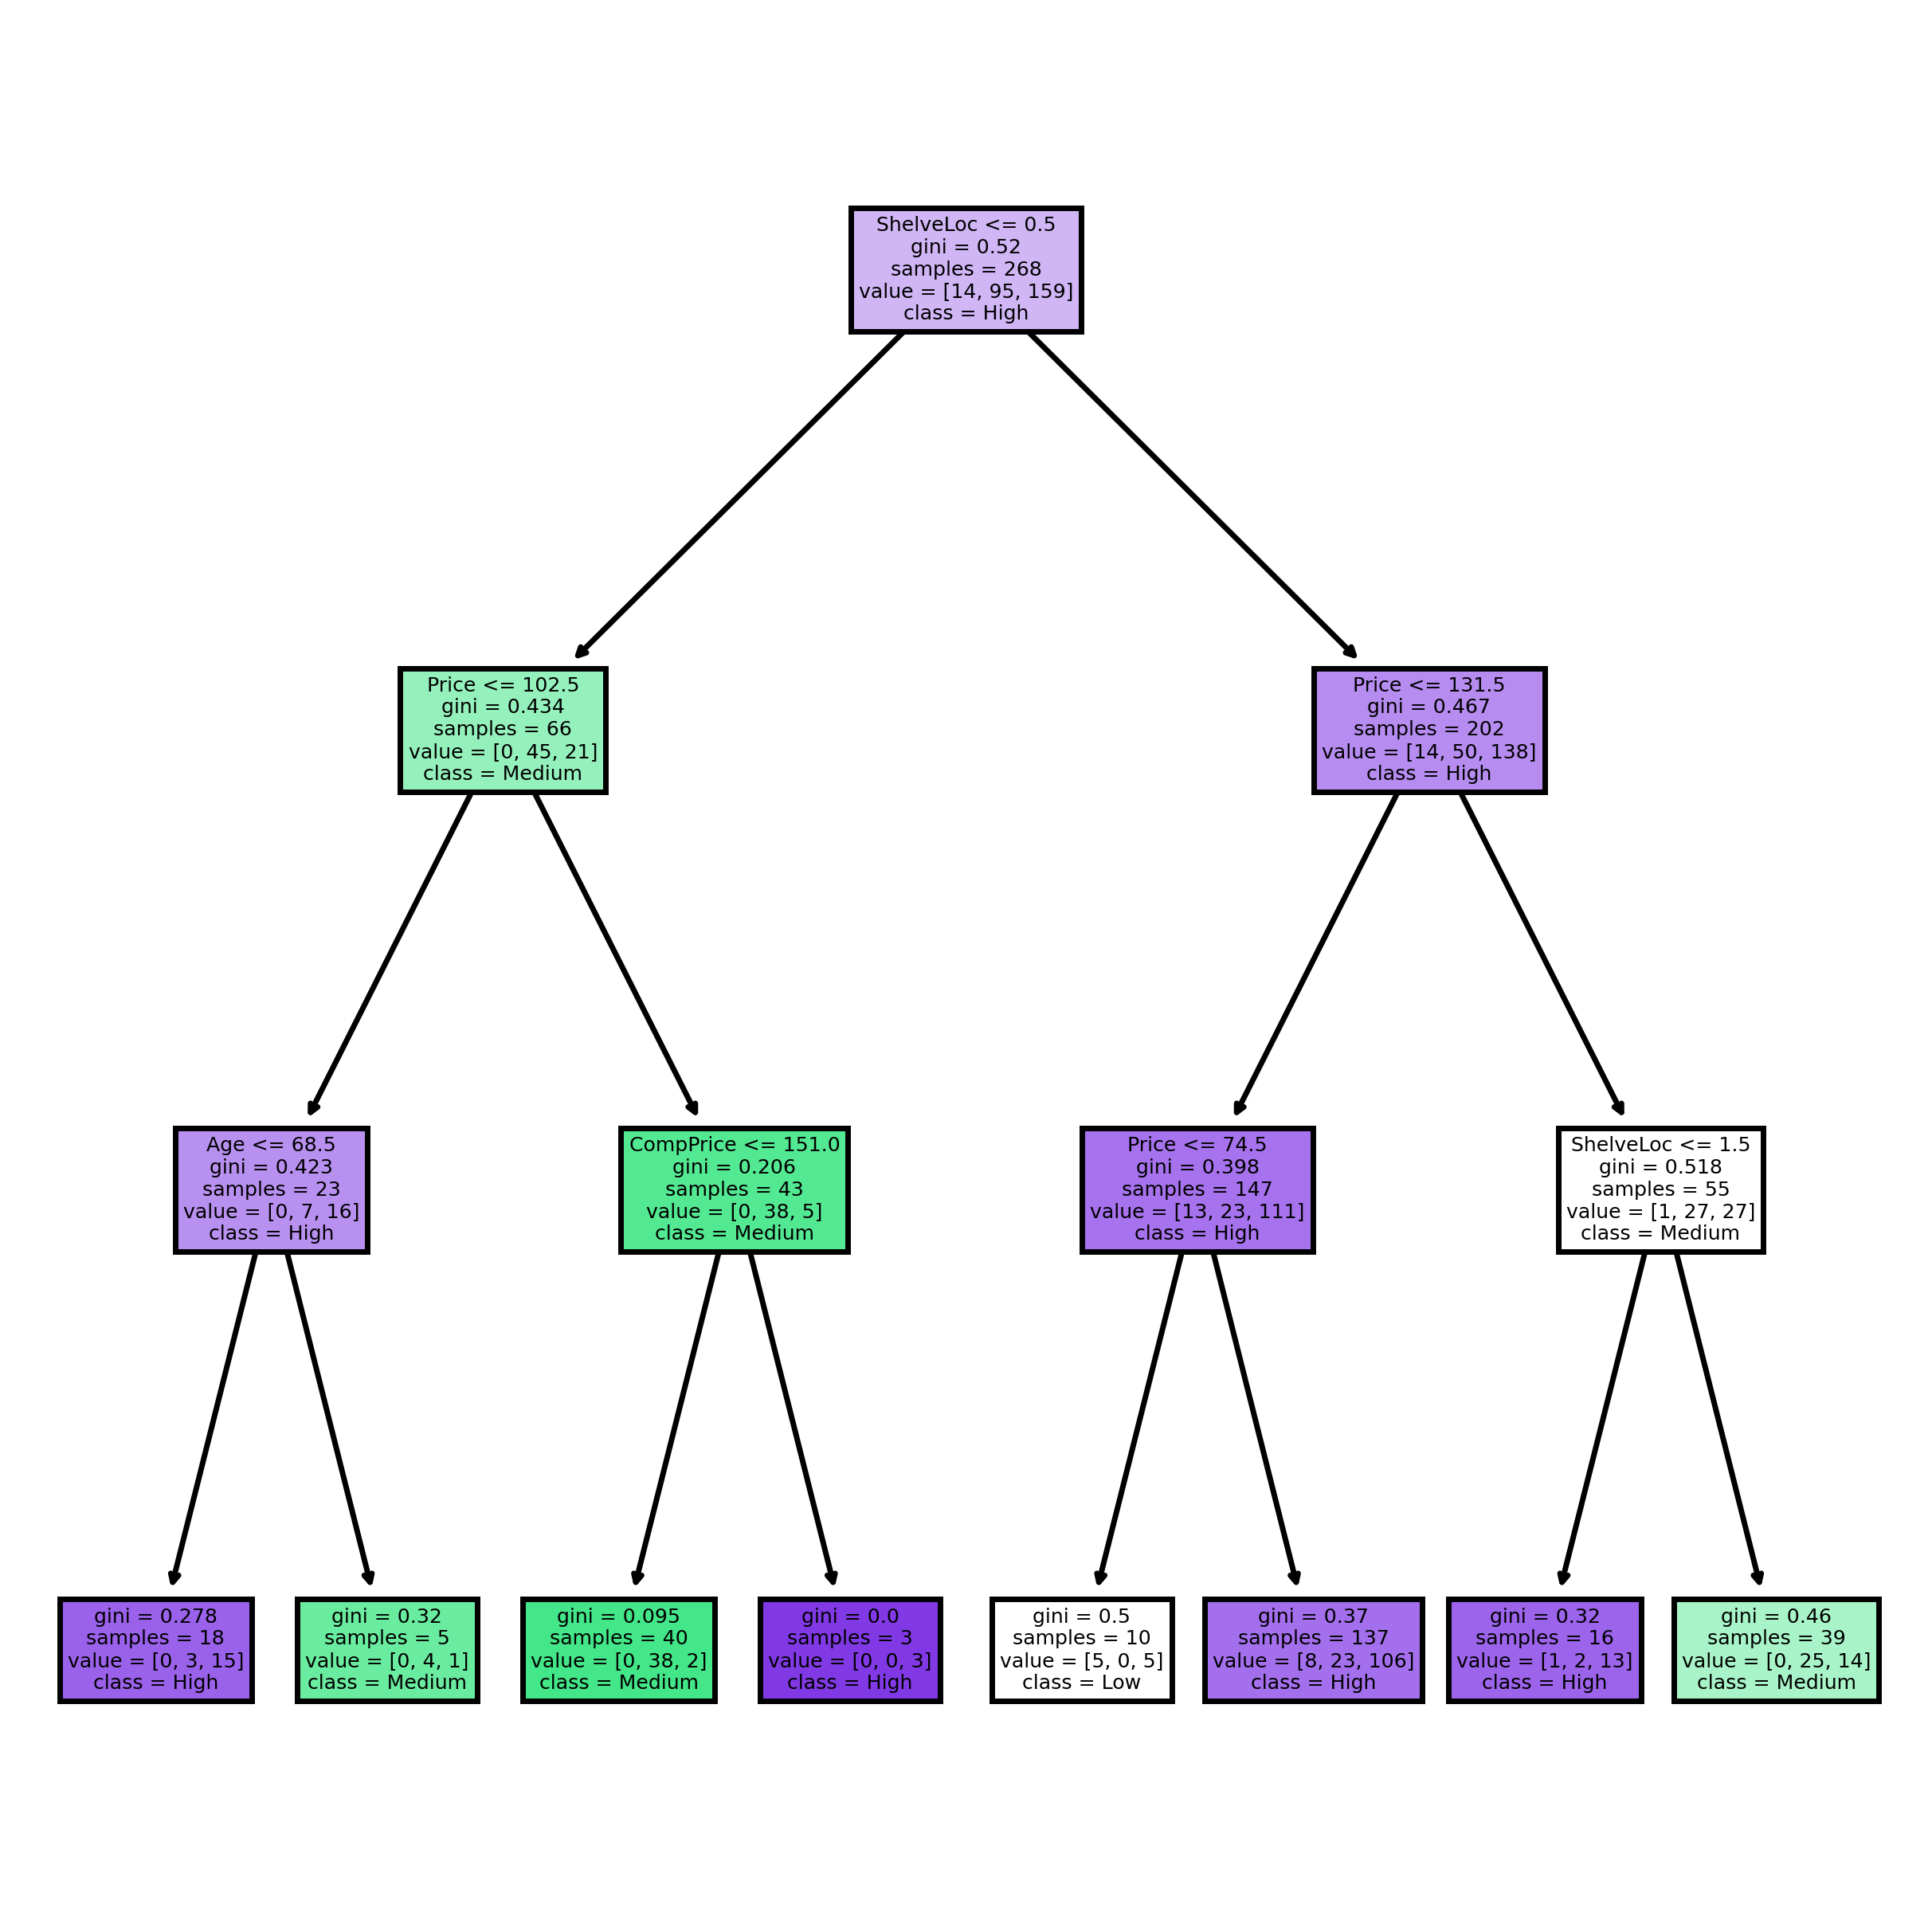

In [69]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium','High']

plt.subplots(figsize = (6,6), dpi=500)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [70]:
#Predicting on test data
preds1 = model1.predict(x_test) # predicting on test data set 
pd.Series(preds1).value_counts() # getting the count of each category 

2    89
1    38
0     5
dtype: int64

In [71]:
#Prediction and computing the accuracy
from sklearn import metrics
metrics.accuracy_score(preds1,y_test)

0.6893939393939394

In [72]:
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

           0       0.40      0.15      0.22        13
           1       0.61      0.66      0.63        35
           2       0.74      0.79      0.76        84

    accuracy                           0.69       132
   macro avg       0.58      0.53      0.54       132
weighted avg       0.67      0.69      0.67       132



# Building Decision Tree Classifier using Entropy Criteria

In [73]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [74]:
#Prediction and computing the accuracy
preds2=model2.predict(x_test)
metrics.accuracy_score(preds2,y_test)

0.6742424242424242

In [75]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.59      0.69      0.63        35
           2       0.75      0.74      0.74        84

    accuracy                           0.67       132
   macro avg       0.57      0.55      0.55       132
weighted avg       0.67      0.67      0.67       132



In [76]:
#Predicting on test data
preds2 = model2.predict(x_test)# predicting on test data set 
pd.Series(preds2).value_counts()# getting the count of each category 

2    83
1    41
0     8
dtype: int64

In [77]:
pd.crosstab(y_test,preds2)

col_0,0,1,2
Sales,,,
0,3,0,10
1,0,24,11
2,5,17,62


In [78]:
np.mean(preds2==y_test)

0.6742424242424242

# Bagging and Boosting ensemble techniques

In [79]:
from sklearn.ensemble import  AdaBoostClassifier,BaggingClassifier

In [80]:
models=[DecisionTreeClassifier(),
        BaggingClassifier(n_estimators=200,max_samples=0.8),
       AdaBoostClassifier(n_estimators=200,random_state=42),
       ]

In [81]:
for model in models:
    model.fit (x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print("===="*20)
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.59      0.74      0.66        35
           2       0.79      0.70      0.74        84

    accuracy                           0.69       132
   macro avg       0.61      0.64      0.62       132
weighted avg       0.70      0.69      0.69       132

BaggingClassifier(max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.72      0.66      0.69        35
           2       0.75      0.88      0.81        84

    accuracy                           0.73       132
   macro avg       0.49      0.51      0.50       132
weighted avg       0.67      0.73      0.70       132

AdaBoostClassifier(n_estimators=200, random_state=42)
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        